Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load the dataset

In [3]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Car.csv")

Data Exploration

In [5]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [7]:
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


Check for missing values

In [9]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


Data Cleaning and Preprocessing

In [10]:
df['Car_Age'] = 2024 - df['Year']

In [11]:
df = df.drop(['Year', 'Car_Name'], axis=1)

In [12]:
df = pd.get_dummies(df, drop_first=True)

Splitting the Data

In [13]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']     

Split the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training and Prediction

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation

In [18]:
rf_predictions = rf_model.predict(X_test_scaled)

In [20]:
print("Random Forest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_predictions))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("R-squared (R2):", r2_score(y_test, rf_predictions))

Random Forest Performance:
Mean Absolute Error (MAE): 0.6166737704918033
Mean Squared Error (MSE): 0.8729097916393433
Root Mean Squared Error (RMSE): 0.9342964152983481
R-squared (R2): 0.9621060281378809


Visualization of Actual vs Predicted for Random Forest

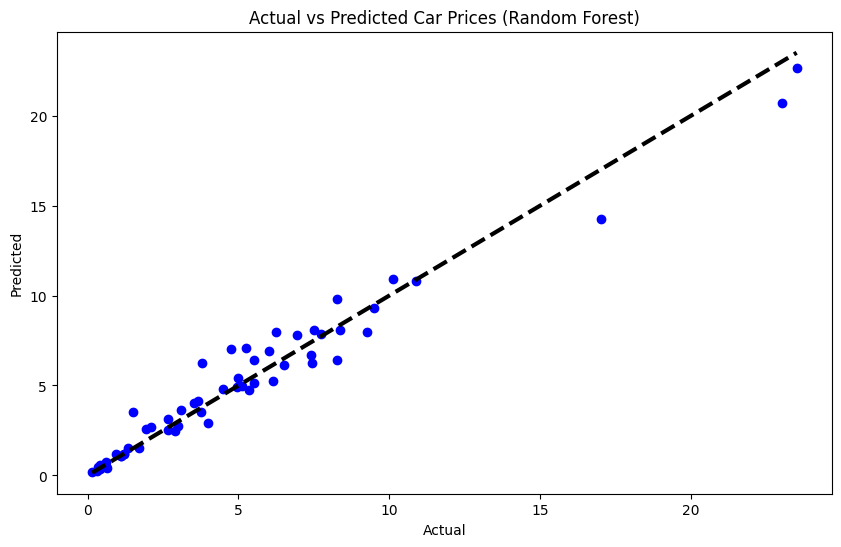

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Car Prices (Random Forest)')
plt.show()